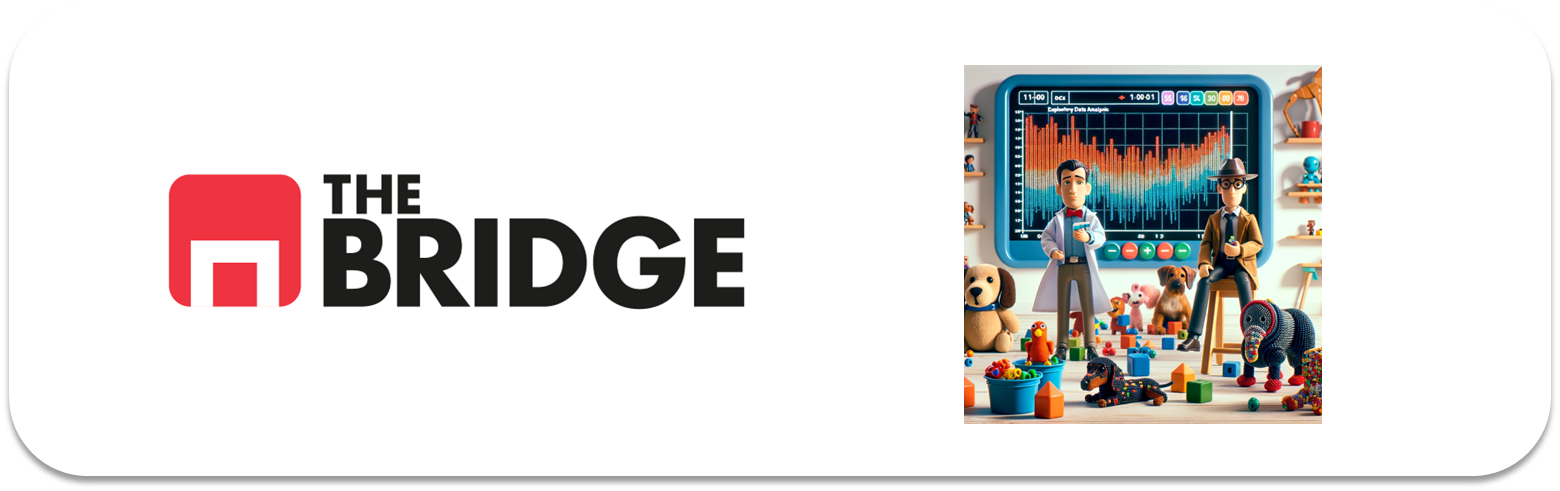

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import seaborn as sns

pd.options.mode.copy_on_write = True

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot,\
        grafico_dispersion_con_correlacion

from scipy.stats import chi2_contingency, mannwhitneyu


## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df = df_titanic.copy()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.drop(["deck", "survived","pclass", "embarked"], axis=1, inplace = True)

In [6]:
df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df["family_members"] = df.parch + df.sibsp

In [6]:
df = df.drop(["parch","sibsp"], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [8]:
#Primero imputamos los nulos
embark_town_mode = df["embark_town"].mode().iloc[0]
embark_town_mode

'Southampton'

In [9]:
#Relleno nulos con media
df["embark_town"] = df["embark_town"].fillna("embardk_town_mode")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [10]:

# Imputo el valor por who en age:
df["age_imputed"] = df.age.isna()

# Separado por mascaras de woman, child y man:
is_woman = df.who == "woman"
is_child = df.who == "child"
is_man = df.who == "man"

#podemos sacar la mediana:
mediana_woman = df.loc[is_woman, "age"].median()
mediana_child = df.loc[is_child, "age"].median()
mediana_man = df.loc[is_man, "age"]. median()

#hago una mascara sobre los valores nulos:
es_age_nulo = df.age.isna()

df.loc[is_woman & es_age_nulo, "age"] = mediana_woman
df.loc[is_child & es_age_nulo, "age"] = mediana_child
df.loc[is_man & es_age_nulo, "age"] = mediana_man

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
 10  age_imputed     891 non-null    bool   
dtypes: bool(3), float64(2), int64(1), object(5)
memory usage: 58.4+ KB


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

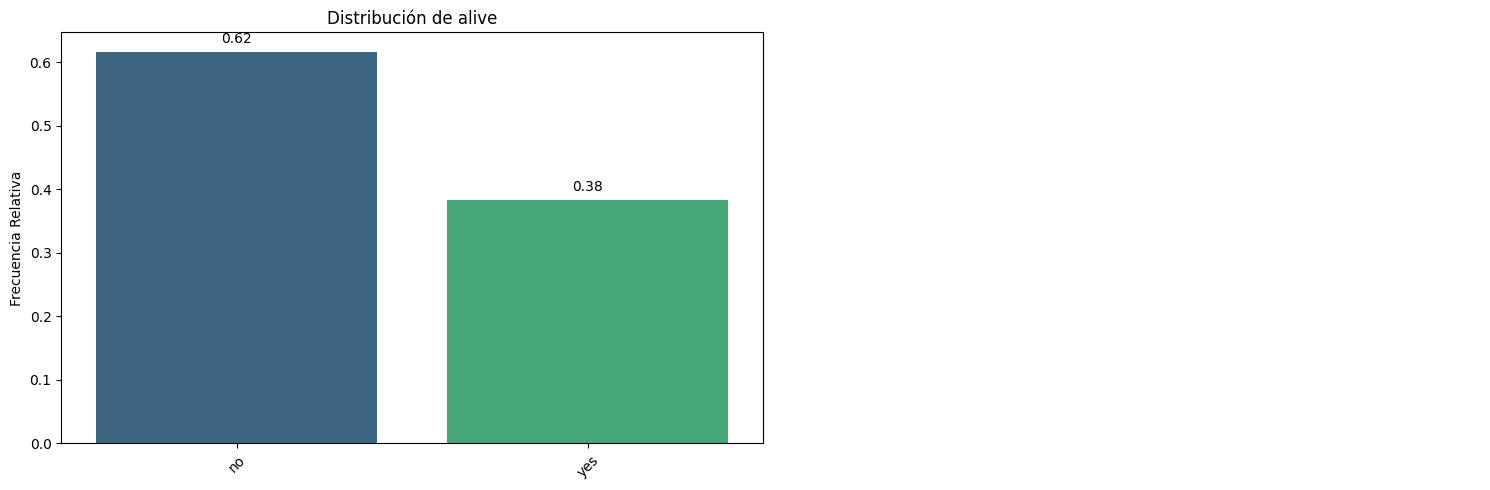

In [11]:
# Inicio con una visualizacion
pinta_distribucion_categoricas(df, ["alive"], relativa= True, mostrar_valores= True)
#Aqui vemos que solo el 38% sobrevivio y el otro 62% no

#### 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

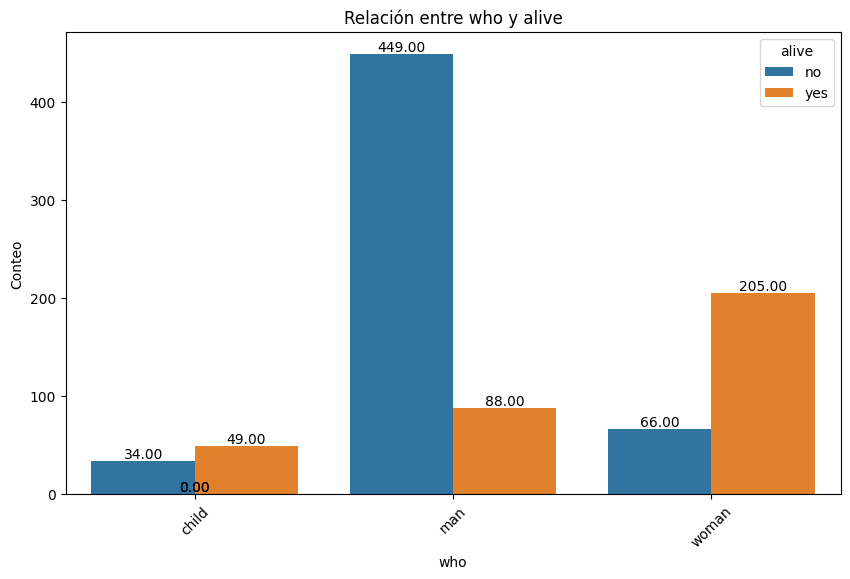

In [12]:
plot_categorical_relationship_fin(df, "who","alive", show_values= True)

1.1 *En terminos ABSOLUTOS sobreviveron mas mujeres con un total de 205 seguido de 88 hombres y 49 niños.*
- Sobrevive “más gente” de un grupo solo porque había más personas de ese grupo:

    - Niños (child): sobreviven 49 y mueren 34
    - Hombres (man): sobreviven 88 y mueren 449
    - Mujeres (woman): sobreviven 205 y mueren 66



 *En terminos RELATIVOS solo sobrevivieron el 38% mientras que el 62% no sobrevivi.*
- Relativo: un grupo tenga mayor probabilidad de sobrevivir aunque en número bruto sobrevivan menos.

    - Niños: 49/(49+34)=49/83≈59.0%
    - Hombres: 88/(88+449)=88/537≈16.4%
    - Mujeres: 205/(205+66)=205/271≈75.6%

“La probabilidad de sobrevivir fue mayor en mujeres (~75.6%), luego niños (~59%), y mucho menor en hombres (~16.4%)”.

In [13]:
# Test de significancia (¿la relación “existe” o pudo ser azar?)

tabla_contingencia = pd.crosstab(df["alive"], df["who"]) #pd.crosstab arma la tabla que necesito para ver relación entre categorías (y luego poder aplicar chi-cuadrado).

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


#### 2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

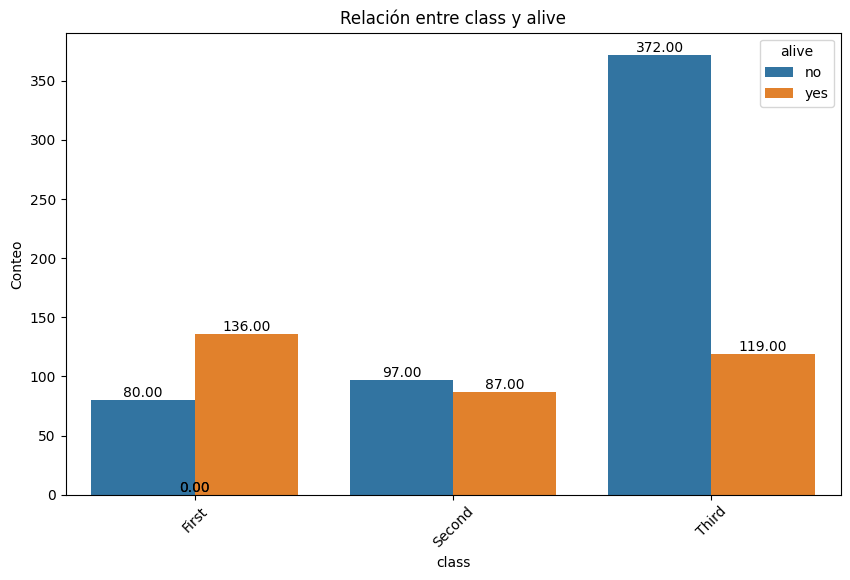

In [14]:
plot_categorical_relationship_fin(df, "class","alive", show_values= True)

* *En términos absolutos sobrevivieron más de primera clase con 136 pasajeros , luego de tercera con 119 pasajeros y luego de segunda con 87 pasajeros*

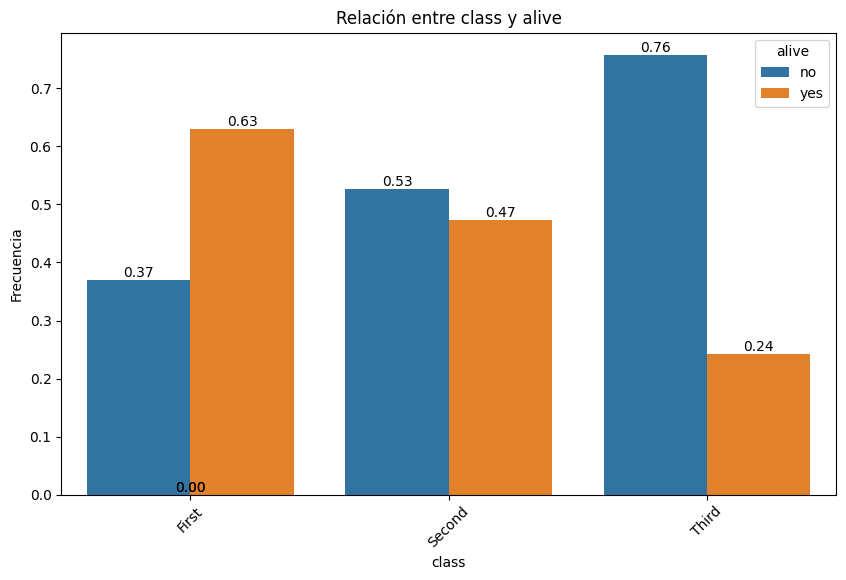

In [15]:
plot_categorical_relationship_fin(df, "class","alive", relative_freq= True, show_values= True)

- En terminos relativos sobrevivieron mas de 1ra clase con un 63%, siendo que de 2da clase solo el 47% y la tercera clase 24%

In [16]:
# Comprobamos la referencia estadistica y hacemos el test chi-2:
tabla_contingencia = pd.crosstab(df["alive"],df["class"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [17]:
# Aqui me guie por la practica SOL
p_value < 0.05 # Podemos rechazar la hipótesis nula de no dependencia

np.True_

*Como casi erea de esperar, la confianza estadística de la existencia de una relación entre la clase y la supervivencia es muy alta*

#### 3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

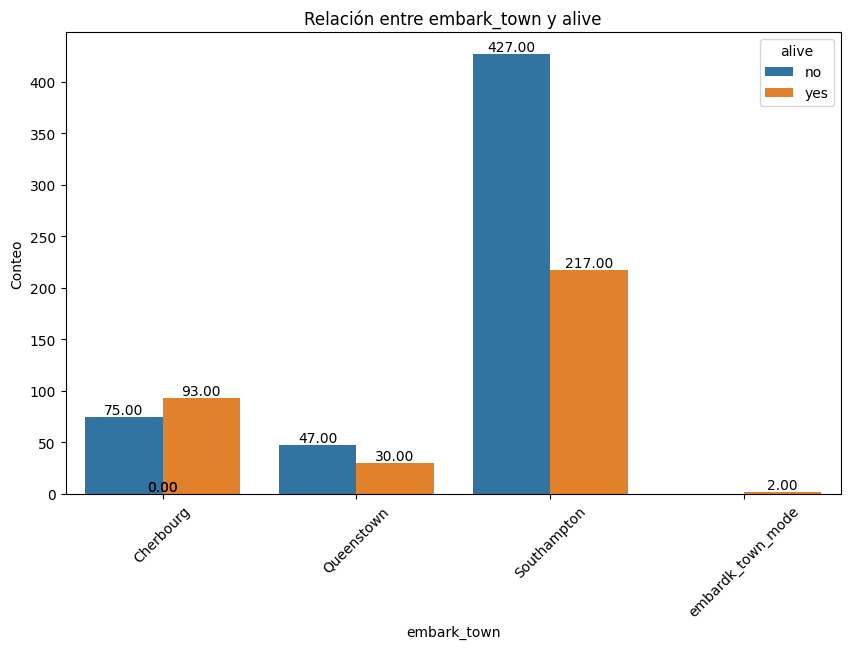

In [18]:
plot_categorical_relationship_fin(df, "embark_town","alive", show_values= True)

- Sobrevivieorn mas personas de Southampton con un total de 217 pasajeros, seguido de Cherbourg con 93 pasajeros y de Queenstown solo 30 pasajeros

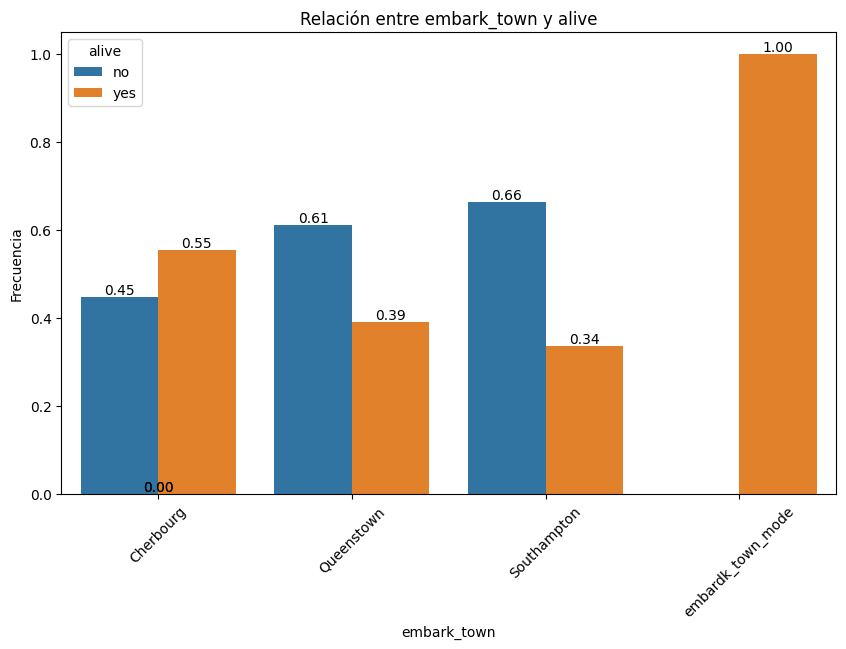

In [19]:
plot_categorical_relationship_fin(df, "embark_town","alive", show_values= True, relative_freq= True)

- Porcentualmnte sobrevivieron mas personas de Cherbourg con un 55%, seguido de Queenstown con un 39% y Southampton solo el 34%

In [20]:
# Hacemos tes chi-2 
tabla_contingencia = pd.crosstab(df["alive"],df["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 29.67061419139438
P-Value: 1.61871880094504e-06
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 396.80808081   1.23232323]
 [ 64.48484848  29.55555556 247.19191919   0.76767677]]


In [21]:
p_value < 0.05 # Podemos rechazar la hipótesis nula de no dependencia

np.True_

#### 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

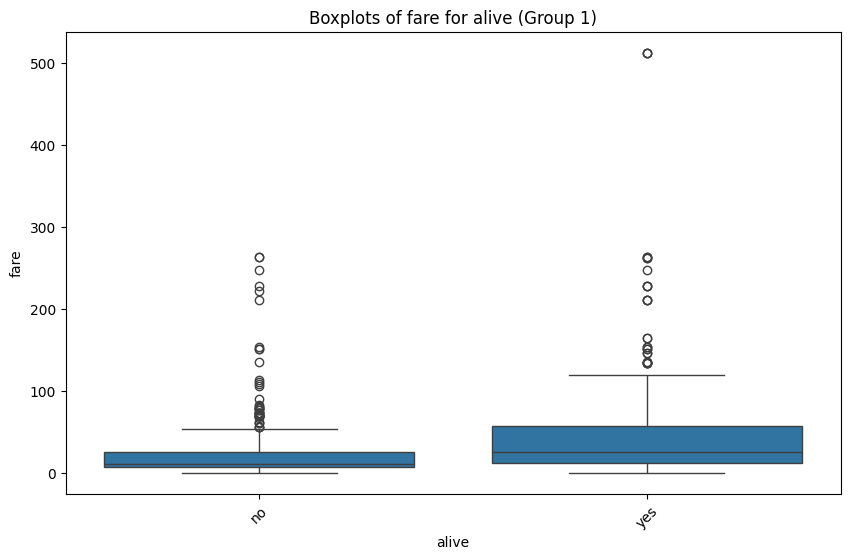

In [24]:
plot_grouped_boxplots(df,"alive","fare")

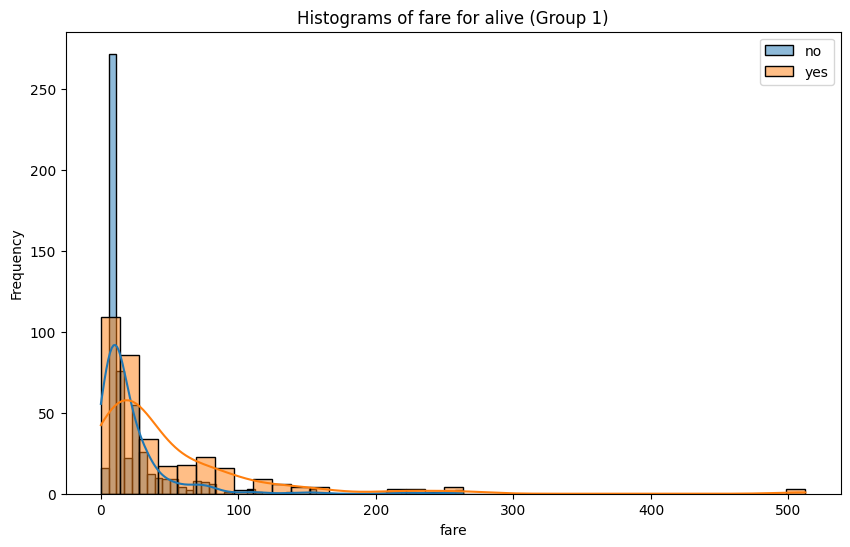

In [25]:
plot_grouped_histograms(df, "alive","fare", group_size = 2)

- No se bien como definir aqui ya que por lo visto me sale mas de referencia el No y entiendo que eso conlleva a las clases 

#### 5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [26]:
df.loc[df.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_imputed
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0,False
263,male,40.0,0.0,First,man,True,Southampton,no,True,0,False
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0,False
277,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0,False
413,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
466,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
481,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0,False
633,male,30.0,0.0,First,man,True,Southampton,no,True,0,True


Aqui vemos que los que no pagaron fueron hombres y todos embarcaron en Southampton con un rango de edad de entre 19 a 40 años, puede ser que fueran los tripulantes?

In [27]:
df.loc[df.fare == df.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_imputed
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,False
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,False
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,False


#### 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

#### 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

(2,)


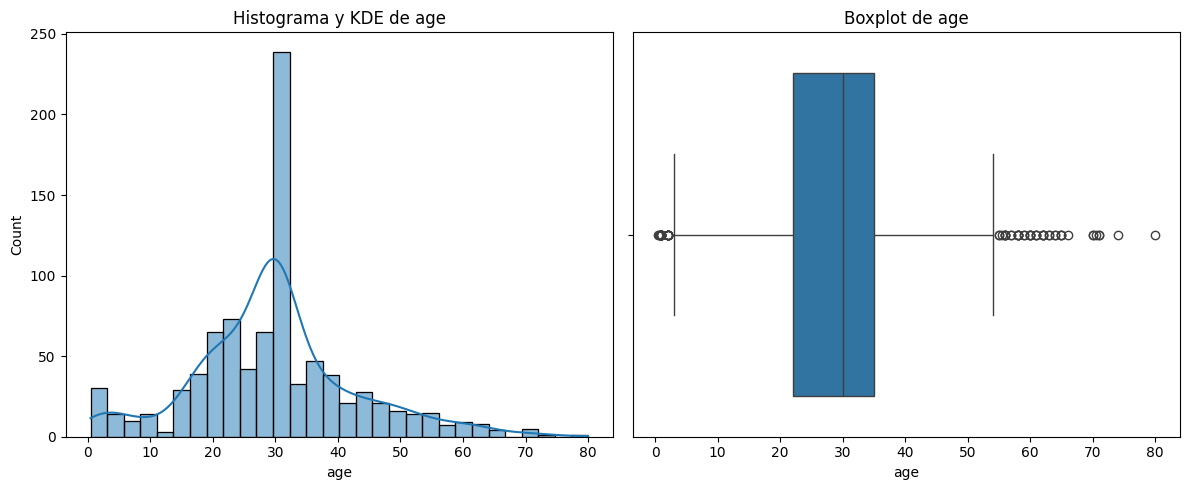

In [28]:
plot_combined_graphs(df,["age"])

#### 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

### Envio mi practica Obligatoria asi ya que no me estoy aclarando del todo con el tema, solicitare una tutoria

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?